In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
from functions import scatter, hist, get_wc_ref_cross, get_wc_names_cross
import numpy as np

In [15]:
datatype = 'px_py_pz'
coef = 'ctG*ctG'

if datatype == 'px_py_pz':
    var = ['Higgs px', 'Higgs py', 'Higgs pz',
           'Top px', 'Top py', 'Top pz',
           'Anti-Top px', 'Anti-Top py', 'Anti-Top pz']
    axt = ['Higgs $p_x$', 'Higgs $p_y$', 'Higgs $p_z$',
           'Top $p_x$', 'Top $p_y$', 'Top $p_z$', 
           'Anti-Top $p_x$', 'Anti-Top $p_y$', 'Anti-Top $p_z$']
    kind = ['higgs_px', 'higgs_py', 'higgs_pz',
           'top_px', 'top_py', 'top_pz',
           'anti-top_px', 'anti-top_py', 'anti-top_pz']

if datatype == 'pt_eta_phi':
    var = ['Higgs pt', 'Higgs eta', 'Higgs phi',
           'Top pt', 'Top eta', 'Top phi',
           'Anti-Top pt', 'Anti-Top eta', 'Anti-Top phi']
    axt = ['Higgs $p_T$', 'Higgs $\eta$', 'Higgs $\phi$',
           'Top $p_T$', 'Top $\eta$', 'Top $\phi$', 
           'Anti-Top $p_T$', 'Anti-Top $\eta$', 'Anti-Top $\phi$']
    kind = ['higgs_pt', 'higgs_eta', 'higgs_phi',
           'top_pt', 'top_eta', 'top_phi',
           'anti-top_pt', 'anti-top_eta', 'anti-top_phi']
h_m = 125
t_m = 173

In [16]:
df = pd.read_feather(str('/scratch365/cmcgrad2/data/' + 
                         datatype + 
                         '/dataframes/' +
                         coef +
                         '.feather')).rename(columns={coef:'r_c'})

In [17]:
df.insert(9, 'SM*SM', pd.read_feather(str('/scratch365/cmcgrad2/data/' + 
                         datatype + 
                         '/dataframes/SM*SM.feather'))['SM*SM'], True)
df

,Higgs px,Higgs py,Higgs pz,Top px,Top py,Top pz,Anti-Top px,Anti-Top py,Anti-Top pz,SM*SM,r_c
0,-114.796463,-123.345131,-7.304227,84.297066,145.898102,-59.592709,19.253984,-35.203690,-35.677189,0.840841,0.802620
1,154.599930,-89.225067,278.119965,-18.486507,197.637299,-281.485931,-63.165237,-301.453400,449.411102,0.836085,0.190634
2,-230.388031,-259.480927,99.590385,68.259842,-80.769157,-97.651382,72.852982,374.988586,207.510056,0.080049,0.019441
3,80.050331,-5.657474,152.550674,-71.436981,45.133221,846.510437,-7.647126,-51.308258,159.170975,0.632328,0.051198
4,55.480797,-4.002732,-370.048462,80.911346,14.778915,-376.707214,-147.343872,-28.103086,-105.656792,0.279235,0.019172
...,...,...,...,...,...,...,...,...,...,...,...
15931396,-135.897507,58.616291,646.054382,92.730026,-108.858360,449.712555,32.275372,49.836647,944.520203,0.372290,0.041591
15931397,-230.149338,809.935364,-1222.776245,124.874329,-790.193909,-215.007736,198.978653,-57.065723,-5.193233,0.000584,0.004126
15931398,41.997223,-235.789062,-323.648071,153.661209,46.351715,-558.962036,40.667294,-74.355453,-970.167542,0.051693,0.043777
15931399,-270.973511,-23.608458,22.670698,-134.682175,32.294903,4.599477,405.908417,-8.622887,275.373596,0.152809,0.018876


In [18]:
h_E = (h_m**2 + df['Higgs px']**2 + df['Higgs py']**2 + df['Higgs pz']**2)**(1/2)
t_E = (t_m**2 + df['Top px']**2 + df['Top py']**2 + df['Top pz']**2)**(1/2)
a_E = (t_m**2 + df['Anti-Top px']**2 + df['Anti-Top py']**2 + df['Anti-Top pz']**2)**(1/2)

dot_h_t = h_E * t_E - (df['Higgs px'] * df['Top px'] + 
                      df['Higgs py'] * df['Top py'] + 
                      df['Higgs pz'] * df['Top pz'])

dot_h_a = h_E * a_E - (df['Higgs px'] * df['Anti-Top px'] + 
                      df['Higgs py'] * df['Anti-Top py'] + 
                      df['Higgs pz'] * df['Anti-Top pz'])

dot_t_a = t_E * a_E - (df['Top px'] * df['Anti-Top px'] + 
                      df['Top py'] * df['Anti-Top py'] + 
                      df['Top pz'] * df['Anti-Top pz'])

df = df.drop(columns=['Higgs px', 'Higgs py', 'Higgs pz',
                 'Top px', 'Top py', 'Top pz',
                 'Anti-Top px', 'Anti-Top py', 'Anti-Top pz'])


In [19]:
len(df.loc[df['r_c'] < 0])/len(df)*100

8.787676614253824e-05

In [8]:
pos = df['r_c']/df['SM*SM'] > 0
neg = df['r_c']/df['SM*SM'] < 0

norm_pos = (df.loc[pos]['r_c'])/(df.loc[pos]['SM*SM'])
norm_neg = (df.loc[neg]['r_c'])/(df.loc[neg]['SM*SM'])

ValueError: The dimension of bins must be equal to the dimension of the  sample x.

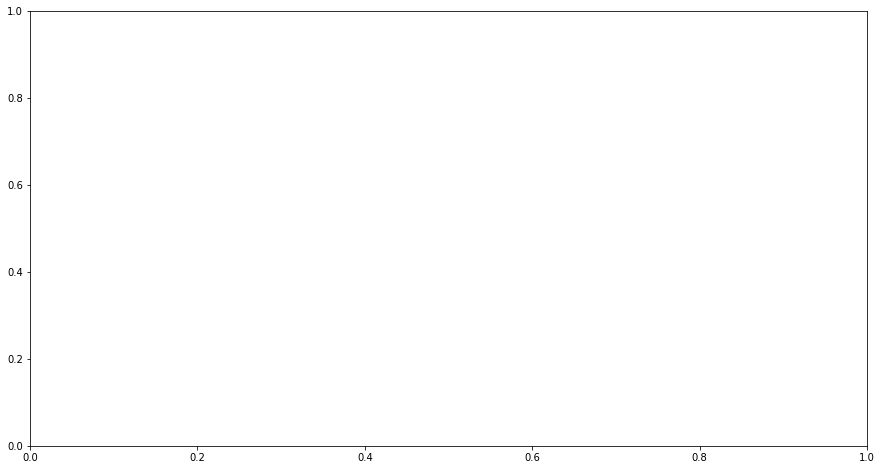

In [41]:
plt.rcParams['figure.figsize'] = [15, 8]

hist, xbins, ybins, im = plt.hist2d(dot_h_t, (df.loc[pos]['r_c'])/(df.loc[pos]['SM*SM']),
                                    bins=[np.logspace(np.log10(2*10**4),
                                                      np.log10(10**8), 250),
                                          np.logspace(np.log10(10**-7), 
                                                      np.log10(10**12), 250)], 
                                    norm = colors.LogNorm())

plt.xlabel('$P_{\,h} \, P_{\,t}$', fontsize=18)
plt.ylabel('$r_{c,|ctG|^2}/r_{c,|SM|^2}$', fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.title(str('Distribution of $r_{c,|ctG|^2}$ as a function of $P_{\,h} \, P_{\,t}$'), fontsize=20)
plt.colorbar()
plt.savefig(str('plots/' + coef + '/' + datatype + '/histograms/div_sm_higgs_dot_top.png'))
plt.show()

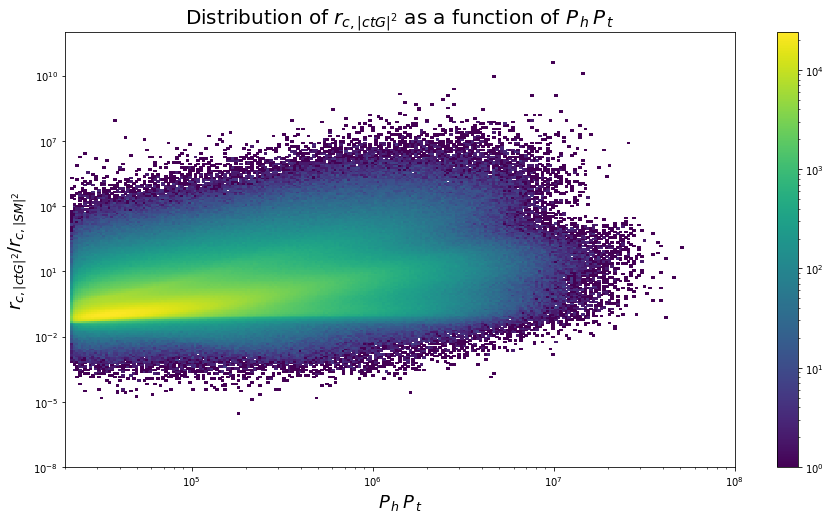

In [32]:
plt.rcParams['figure.figsize'] = [15, 8]

hist, xbins, ybins, im = plt.hist2d(dot_h_t, df['r_c']/df['SM*SM'],
                                    bins=[np.logspace(np.log10(2*10**4),
                                                      np.log10(10**8), 250),
                                          np.logspace(np.log10(10**-8), 
                                                      np.log10(10**12), 250)], 
                                    norm = colors.LogNorm())

plt.xlabel('$P_{\,h} \, P_{\,t}$', fontsize=18)
plt.ylabel('$r_{c,|ctG|^2}/r_{c,|SM|^2}$', fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.title(str('Distribution of $r_{c,|ctG|^2}$ as a function of $P_{\,h} \, P_{\,t}$'), fontsize=20)
plt.colorbar()
plt.savefig(str('plots/' + coef + '/' + datatype + '/histograms/div_sm_higgs_dot_top.png'))
plt.show()

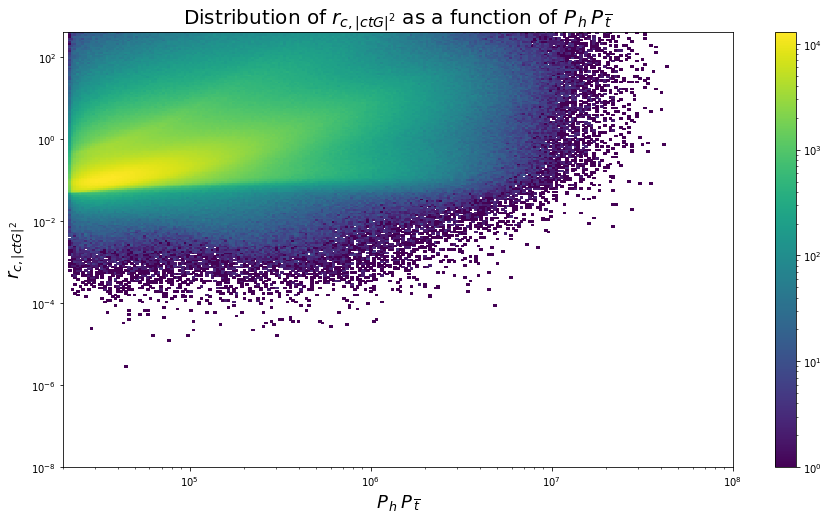

In [8]:
plt.rcParams['figure.figsize'] = [15, 8]

hist, xbins, ybins, im = plt.hist2d(dot_h_a, df['r_c']/df['SM*SM'], bins=[np.logspace(np.log10(2*10**4), np.log10(10**8), 250),
                                     np.logspace(np.log10(10**-8), np.log10(400), 250)], norm = colors.LogNorm())
plt.xlabel('$P_{\,h} \, P_{\,\overline{t}}$', fontsize=18)
plt.ylabel('$r_{c,|ctG|^2}$', fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.title(str('Distribution of $r_{c,|ctG|^2}$ as a function of $P_{\,h} \, P_{\,\overline{t}}$'), fontsize=20)
plt.colorbar()
plt.savefig(str('plots/' + coef + '/' + datatype + '/histograms/div_sm_higgs_dot_antitop.png'))
plt.show()

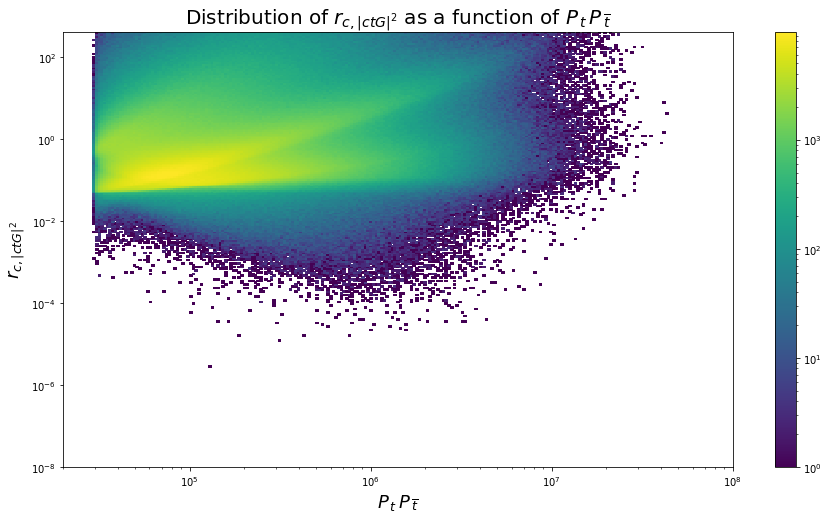

In [10]:
plt.rcParams['figure.figsize'] = [15, 8]

hist, xbins, ybins, im = plt.hist2d(dot_t_a, df['r_c']/df['SM*SM'], bins=[np.logspace(np.log10(2*10**4),np.log10(10**8), 250),
                                     np.logspace(np.log10(10**-8),np.log10(400), 250)], norm = colors.LogNorm())
plt.xlabel('$P_{\,t} \, P_{\,\overline{t}}$', fontsize=18)
plt.ylabel('$r_{c,|ctG|^2}$', fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.title(str('Distribution of $r_{c,|ctG|^2}$ as a function of $P_{\,t} \, P_{\,\overline{t}}$'),fontsize=20)
plt.colorbar()
plt.savefig(str('plots/' + coef + '/' + datatype + '/histograms/div_sm_top_dot_antitop.png'))
plt.show()

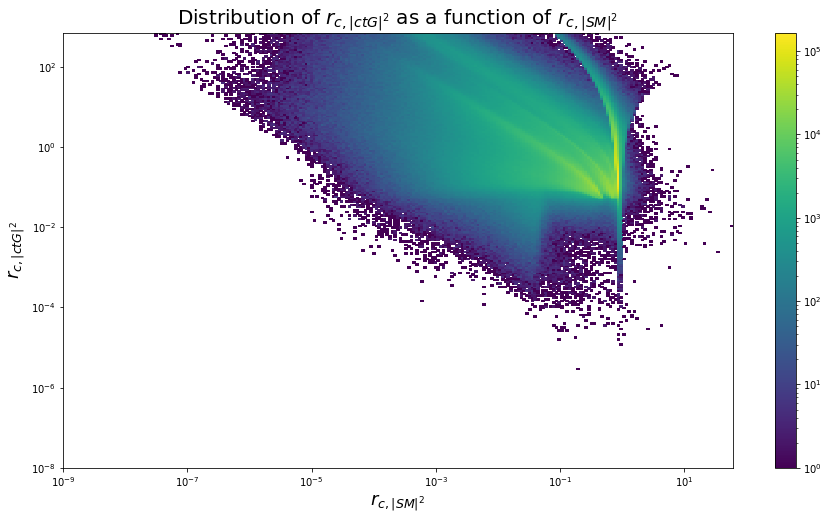

In [12]:
plt.rcParams['figure.figsize'] = [15, 8]

hist, xbins, ybins, im = plt.hist2d(df['SM*SM'], df['r_c']/df['SM*SM'], bins=[np.logspace(np.log10(10**-9),np.log10(60), 250),
                                     np.logspace(np.log10(10**-8),np.log10(700), 250)], norm = colors.LogNorm())

plt.xlabel('$r_{c,|SM|^2}$', fontsize=18)
plt.ylabel('$r_{c,|ctG|^2}$', fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of $r_{c,|ctG|^2}$ as a function of $r_{c,|SM|^2}$', fontsize=20)
plt.colorbar()
plt.savefig(str('plots/' + coef + '/' + datatype + '/histograms/div_sm_ctG*ctG_vs_SM*SM.png'))
plt.show()

In [ ]:
dot_h_t.loc[norm_pos]

print("Number of Entries: ", str("{:,}".format(len(df))))
bins, n = hist(df, ' (Log)', 'log', datatype, coef)

for i, name in enumerate(var):
    scatter(df, name, kind[i], axt[i], ' Full', 'full', datatype, coef, color='c.')
    scatter(peak, name, kind[i], axt[i], ' Peak', 'peak', datatype, coef, color='g.')
    scatter(peak_bar, name, kind[i], axt[i], ' $\overline{\mathrm{Peak}}$', 'peak_bar', datatype, coef)

for i, name in enumerate(var):
    plt.plot(peak[name].to_numpy(), peak['r_c'].to_numpy(), 'g.', label='Peak')
    plt.plot(peak_bar[name].to_numpy(), peak_bar['r_c'].to_numpy(), 'b.', label='$\overline{\mathrm{Peak}}$')
    plt.grid(b=True, color='grey', alpha=0.2, linestyle=':', linewidth=2)
    plt.xlabel(axt[i], fontsize=15)
    plt.xticks(fontsize=13)
    plt.ylabel('$r_c$', fontsize=15)
    plt.yticks(fontsize=13)
    plt.legend(loc="best", fontsize=12)
    plt.title(str(coef + 'Full Dataset Output vs Input'), fontsize=16)
    plt.savefig(str('plots/' + coef + '/' + datatype + '/scatter_plots/separated/rc_vs_' + kind[i] + '.png'))
    plt.yscale('log')
    plt.title(str(coef + 'Full Dataset Output vs Input (Log)'), fontsize=16)
    plt.savefig(str('plots/' + coef + '/' + datatype + '/scatter_plots/separated_log/rc_vs_' + kind[i] + '.png'))
    plt.show()